In [21]:
import random
import numpy
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap import benchmarks

import matplotlib.pyplot as plt

In [22]:
creator.create("Fitness", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

c:\Users\fbioa\Desktop\Comp Evolutiva\env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\fbioa\Desktop\Comp Evolutiva\env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", random.uniform, -600, 600)
# Vetor de floats de 3 posições
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_float, 3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [24]:
toolbox.register("evaluate", benchmarks.griewank)
toolbox.register("mate", tools.cxTwoPoint)# TwoPoint, Uniform, OnePoint
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.4, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
#toolbox.register("select", tools.selRoulette)

In [25]:
def main():
    random.seed(64)
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=1000, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

gen	nevals	avg    	std    	min    	max    
0  	50    	96.2877	47.7262	11.3144	234.142
1  	29    	50.7636	34.2122	2.67366	165.198
2  	39    	22.7216	17.8682	1.24906	69.5752
3  	23    	8.92044	6.50111	1.24906	26.7202
4  	31    	3.97321	2.88162	1.24906	13.8641
5  	31    	1.99324	0.949817	0.952167	4.41301
6  	32    	1.45117	0.35604 	0.952167	2.88342
7  	29    	1.24079	0.144454	0.952167	1.83309
8  	24    	1.15229	0.130688	0.952167	1.24906
9  	26    	1.01446	0.121968	0.70971 	1.24906
10 	30    	0.93285	0.0969851	0.684064	1.24906
11 	24    	0.883604	0.0966632	0.617844	0.952167
12 	31    	0.802471	0.116697 	0.589523	0.952167
13 	26    	0.716726	0.0959151	0.525326	0.91273 
14 	38    	0.641806	0.0486812	0.525326	0.720025
15 	27    	0.609238	0.0478154	0.51572 	0.712041
16 	33    	0.562767	0.0291082	0.511348	0.617844
17 	31    	0.537758	0.0231971	0.511348	0.609938
18 	28    	0.523816	0.0196341	0.511348	0.630429
19 	26    	0.536043	0.109259 	0.511348	1.25086 
20 	30    	0.51723 	0.0316549	0.511348	

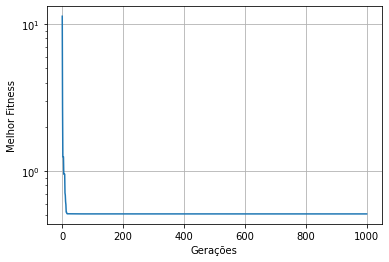

In [26]:
if __name__ == '__main__':
    results = main()
    
    gen = results[1].select('gen')
    
    best_per_gen = results[1].select('min')
    
    t = gen
    s = best_per_gen
    fig, ax = plt.subplots()
    ax.plot(t,s)
    ax.set(xlabel='Gerações', ylabel='Melhor Fitness')
    ax.grid()
    plt.yscale('log')
    plt.show()

C:\Users\fbioa\AppData\Local\Temp/ipykernel_10172/318812243.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim = -29, elev = 40)
C:\Users\fbioa\AppData\Local\Temp/ipykernel_10172/318812243.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = np.fromiter(map(griewank_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.

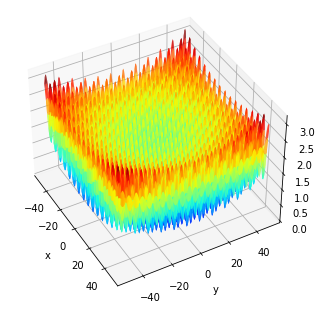

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

try:
    import numpy as np
except:
    exit()

from deap import benchmarks

def griewank_arg0(sol):
    return benchmarks.griewank(sol)[0]

fig = plt.figure()
ax = Axes3D(fig, azim = -29, elev = 40)
# ax = Axes3D(fig)
X = np.arange(-50, 50, 0.5)
Y = np.arange(-50, 50, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.fromiter(map(griewank_arg0, zip(X.flat,Y.flat)), dtype=np.float, count=X.shape[0]*X.shape[1]).reshape(X.shape)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0.2)
 
plt.xlabel("x")
plt.ylabel("y")

plt.show()